# PhyChi - Station Caluire - 11/2011 à 11/2021

Données téléchargé sur le site :  
http://naiades.eaufrance.fr/acces-donnees#/physicochimie  

ID Station Caluire : '06059500'  

Description des champs dans le répertoire : raw_data/phys_caluire_2011_2021/DescriptionDonnees.pdf

In [1]:
import pandas as pd

In [2]:
phys_df = pd.read_csv(
    "../../raw_data/phys_caluire_2011_2021/Analyses.CSV",
    sep=';',
    on_bad_lines='skip'
)

/home/sve/.pyenv/versions/3.8.12/envs/water_pollution/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (42) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
phys_df.shape

(79711, 51)

In [4]:
phys_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 79711 entries, 0 to 79710
Data columns (total 51 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CdStationMesureEauxSurface  79711 non-null  int64  
 1   LbStationMesureEauxSurface  79711 non-null  object 
 2   CdSupport                   79711 non-null  int64  
 3   LbSupport                   79711 non-null  object 
 4   CdFractionAnalysee          79711 non-null  int64  
 5   LbFractionAnalysee          79711 non-null  object 
 6   CdPrelevement               79711 non-null  int64  
 7   DatePrel                    79711 non-null  object 
 8   HeurePrel                   79711 non-null  object 
 9   DateAna                     62521 non-null  object 
 10  HeureAna                    0 non-null      float64
 11  CdParametre                 79711 non-null  int64  
 12  LbLongParamètre             79711 non-null  object 
 13  RsAna                       797

In [5]:
id_station = 6059500 # /!\ transformé en int par pandas, enlever les 0 éventuels

In [6]:
# Colonne pour le traitement
selected_col = [
    'CdStationMesureEauxSurface', # id station
    'LbStationMesureEauxSurface', # label station
    'DatePrel',                   # date mesure
    'CdParametre',                # code du paramètre
    'LbLongParamètre',            # label du paramètre
    'RsAna',                      # resultat de la mesure
    'CdQualAna'                   # Code de la qualification du résultat :
                                  # 1 -> correcte / autre, à filtrer
]

# Colonnes intéressantes, à étudier
potential_col = [
    'SymUniteMesure',             # symbole de l'unité de mesure (°C...)
    'LQAna',                      # limite de quantification (sous laquelle la mesure n'est pas fidèle)
    'LSAna',                      # limite de saturation
    'IncertAna',                  # incertitude analytique
    
]

# Colonnes finales à concaténer
final_col = [
    'DatePrel',                   # date mesure
    'RsAna',                      # resultat de la mesure

]

In [7]:
filtered_phys_df = phys_df[selected_col]

In [8]:
filtered_phys_df = filtered_phys_df[filtered_phys_df['CdStationMesureEauxSurface'] == id_station]

In [9]:
filtered_phys_df

,CdStationMesureEauxSurface,LbStationMesureEauxSurface,DatePrel,CdParametre,LbLongParamètre,RsAna,CdQualAna
0,6059500,SAONE A LYON 1,2018-09-04,7499,Fluopicolide,0.020,1
1,6059500,SAONE A LYON 1,2014-10-29,1169,Dichlorprop,20.000,1
2,6059500,SAONE A LYON 1,2021-05-05,5840,Tributyl phosphorotrithioite,0.020,1
3,6059500,SAONE A LYON 1,2015-09-03,1340,Nitrates,3.300,1
4,6059500,SAONE A LYON 1,2018-04-09,1678,Diméthénamide,0.005,1
...,...,...,...,...,...,...,...
79706,6059500,SAONE A LYON 1,2018-03-13,1834,"Dichloropropène-1,3 cis",0.050,1
79707,6059500,SAONE A LYON 1,2019-03-29,2821,4-Chloro-2-méthylaniline,0.020,1
79708,6059500,SAONE A LYON 1,2018-01-10,7150,Terbuthylazine desethyl-2-hydroxy,0.020,1
79709,6059500,SAONE A LYON 1,2016-03-10,1290,Vamidothion,0.010,1


In [10]:
filtered_phys_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79711 entries, 0 to 79710
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CdStationMesureEauxSurface  79711 non-null  int64  
 1   LbStationMesureEauxSurface  79711 non-null  object 
 2   DatePrel                    79711 non-null  object 
 3   CdParametre                 79711 non-null  int64  
 4   LbLongParamètre             79711 non-null  object 
 5   RsAna                       79711 non-null  float64
 6   CdQualAna                   79711 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 4.9+ MB


In [11]:
mesure_quantity = filtered_phys_df.groupby('CdParametre').count()[['DatePrel']]
mesure_quantity.rename(columns={"DatePrel": "count"},inplace=True)
mesure_quantity.sort_values('count', ascending=False,inplace=True)

mesure_quantity.shape

(1242, 1)

**1242 types de mesures différents**

In [12]:
mesure_quantity[mesure_quantity['count'] >= 120].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 1303 to 1342
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   17 non-null     int64
dtypes: int64(1)
memory usage: 272.0 bytes


In [13]:
mesure_quantity[mesure_quantity['count'] >= 100].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 1303 to 1864
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   91 non-null     int64
dtypes: int64(1)
memory usage: 1.4 KB


In [14]:
mesure_quantity[mesure_quantity['count'] >= 60].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 753 entries, 1303 to 1121
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   count   753 non-null    int64
dtypes: int64(1)
memory usage: 11.8 KB


17 parametres with 120 mesures ou plus sur 10 ans  
90 avec 100 paramètres ou plus  
753 avec 60 paramètres ou plus  

On part pour l'instant sur la récupération des paramètres avec plus de 120 mesures sur deux ans

In [15]:
selected_param_ids = mesure_quantity[mesure_quantity['count'] >= 120]
selected_param_ids = selected_param_ids.index

In [16]:
selected_param_ids

Int64Index([1303, 1311, 1301, 1302, 1312, 1841, 1295, 1335, 1314, 1433, 1313,
            1350, 1319, 1340, 1339, 1305, 1342],
           dtype='int64', name='CdParametre')

In [17]:
# Table id <-> label
param_id_lb = filtered_phys_df.copy()

param_id_lb = param_id_lb.groupby(['LbLongParamètre','CdParametre'],as_index=False).sum()
param_id_lb = param_id_lb[['CdParametre','LbLongParamètre']]
param_id_lb.set_index('CdParametre',inplace=True)
param_id_lb.index.name = 'id'
param_id_lb.loc[1303]

LbLongParamètre    Conductivité à 25°C
Name: 1303, dtype: object

## Extraction :
- liste des paramètres fixée en dur
- id et nom de la station fixé en dur

In [18]:
# Liste des paramètres à extraire (champ 'CdParametre')

param_ids = [
    1303,
    1311,
    1301,
    1302,
    1312,
    1841,
    1295,
    1335,
    1314,
    1433,
    1313,
    1350,
    1319,
    1340,
    1339,
    1305,
    1342
]


In [19]:
for param_id in param_ids :
    print(param_id, ' : ',param_id_lb.loc[param_id,'LbLongParamètre'])

1303  :  Conductivité à 25°C
1311  :  Oxygène dissous
1301  :  Température de l'Eau
1302  :  Potentiel en Hydrogène (pH)
1312  :  Taux de saturation en oxygène
1841  :  Carbone Organique
1295  :  Turbidité Formazine Néphélométrique
1335  :  Ammonium
1314  :  Demande Chimique en Oxygène (DCO)
1433  :  Orthophosphates (PO4)
1313  :  Demande Biochimique en oxygène en 5 jours (D.B.O.5)
1350  :  Phosphore total
1319  :  Azote Kjeldahl
1340  :  Nitrates
1339  :  Nitrites
1305  :  Matières en suspension
1342  :  Silicates


In [20]:
# dictionary storing temporary df :
# key = param code
# value = df
df_dict = {}

for param_id in param_ids :
    df_dict[param_id] = filtered_phys_df[filtered_phys_df['CdParametre'] == param_id][final_col]
    df_dict[param_id].rename(columns={'RsAna':f'{param_id}'},inplace=True)
    df_dict[param_id].sort_values('DatePrel',inplace=True)
    
    # merges mesures done the same day, does the mean
    # MUST be done for the chained outer joins to come
    df_dict[param_id] = df_dict[param_id].groupby('DatePrel',as_index=False).mean()



In [21]:
df_dict.keys()

dict_keys([1303, 1311, 1301, 1302, 1312, 1841, 1295, 1335, 1314, 1433, 1313, 1350, 1319, 1340, 1339, 1305, 1342])

In [22]:
merged_df = None

for df in df_dict.values() :
    
    if merged_df is None :
        merged_df = df.copy() # merged_df = df for the first element
    
    else :
        merged_df = pd.merge(merged_df,df,how='outer',on='DatePrel',suffixes=('','_dup'))
        merged_df.drop(merged_df.filter(regex='_dup$').columns.tolist(),axis=1, inplace=True)

merged_df.sort_values('DatePrel',inplace=True)

In [23]:
merged_df

,DatePrel,1303,1311,1301,1302,1312,1841,1295,1335,1314,1433,1313,1350,1319,1340,1339,1305,1342
0,2011-11-22,744.0,9.4,10.8,7.9,86.0,2.5,4.3,0.11,8.5,0.21,0.5,0.080,1.0,11.1,0.06,2.8,NaN
1,2012-01-23,508.0,11.7,5.9,7.9,95.0,2.4,20.0,0.06,8.7,0.14,1.2,0.090,1.0,13.0,0.05,27.0,NaN
2,2012-02-14,533.0,13.8,0.2,8.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2012-03-12,501.0,12.2,9.2,8.4,108.0,2.2,7.8,0.05,10.0,0.02,4.4,0.030,1.0,10.6,0.04,7.6,NaN
4,2012-04-24,489.0,10.6,11.5,8.0,100.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,2021-06-07,487.0,8.4,20.0,8.0,93.0,2.2,5.1,0.06,20.0,0.17,0.6,0.071,0.5,9.3,0.07,9.2,5.3
173,2021-06-25,464.0,8.1,23.3,7.9,95.0,2.7,5.7,0.10,20.0,0.21,0.5,0.084,0.5,8.5,0.07,18.0,5.4
174,2021-07-09,466.0,8.5,20.6,8.1,96.0,2.7,22.0,0.06,20.0,0.24,0.9,0.130,0.5,8.9,0.05,28.0,6.2
175,2021-07-29,481.0,7.5,23.3,7.8,89.0,5.0,13.7,0.12,29.0,0.16,2.9,0.100,1.3,6.9,0.06,15.0,7.8


In [24]:
# Converts 'DatePrel' to datetime and sets it as index
merged_df['DatePrel'] =  pd.to_datetime(merged_df['DatePrel'])
merged_df = merged_df.set_index('DatePrel')

In [25]:
## Fill NaN values

# First row NaN values filled with mean
merged_df.iloc[0,:] = merged_df.iloc[0,:].fillna(merged_df.mean())

# Next NaN values filled with previous non NaN values
merged_df = merged_df.fillna(method='ffill')

In [26]:
merged_df

,1303,1311,1301,1302,1312,1841,1295,1335,1314,1433,1313,1350,1319,1340,1339,1305,1342
DatePrel,,,,,,,,,,,,,,,,,
2011-11-22,744.0,9.4,10.8,7.9,86.0,2.5,4.3,0.11,8.5,0.21,0.5,0.080,1.0,11.1,0.06,2.8,4.999609
2012-01-23,508.0,11.7,5.9,7.9,95.0,2.4,20.0,0.06,8.7,0.14,1.2,0.090,1.0,13.0,0.05,27.0,4.999609
2012-02-14,533.0,13.8,0.2,8.0,98.0,2.4,20.0,0.06,8.7,0.14,1.2,0.090,1.0,13.0,0.05,27.0,4.999609
2012-03-12,501.0,12.2,9.2,8.4,108.0,2.2,7.8,0.05,10.0,0.02,4.4,0.030,1.0,10.6,0.04,7.6,4.999609
2012-04-24,489.0,10.6,11.5,8.0,100.0,2.2,7.8,0.05,10.0,0.02,4.4,0.030,1.0,10.6,0.04,7.6,4.999609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-06-07,487.0,8.4,20.0,8.0,93.0,2.2,5.1,0.06,20.0,0.17,0.6,0.071,0.5,9.3,0.07,9.2,5.300000
2021-06-25,464.0,8.1,23.3,7.9,95.0,2.7,5.7,0.10,20.0,0.21,0.5,0.084,0.5,8.5,0.07,18.0,5.400000
2021-07-09,466.0,8.5,20.6,8.1,96.0,2.7,22.0,0.06,20.0,0.24,0.9,0.130,0.5,8.9,0.05,28.0,6.200000


In [29]:
merged_df.to_csv('2011_2021_caluire_phys_v0.csv')

In [27]:
import matplotlib.pyplot as plt

Conductivité à 25°C


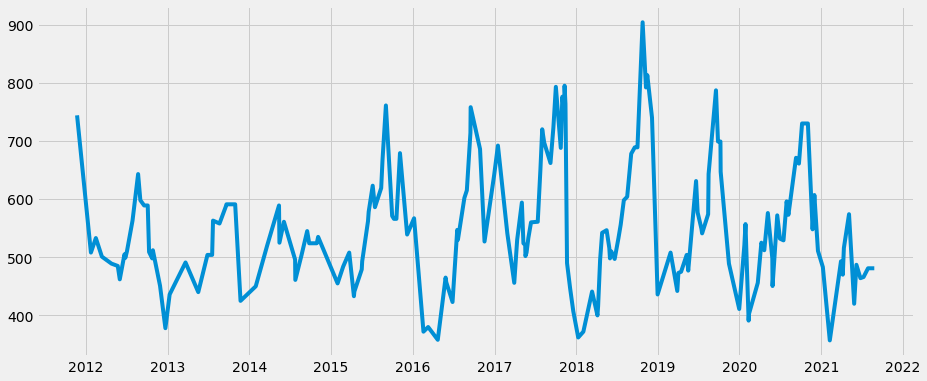

Oxygène dissous


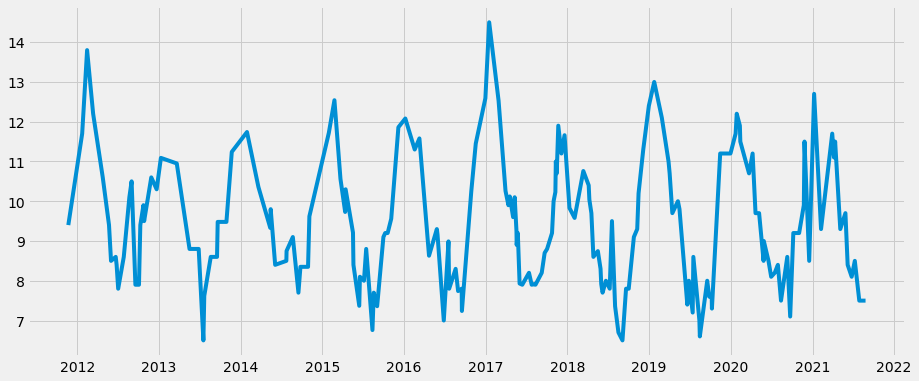

Température de l'Eau


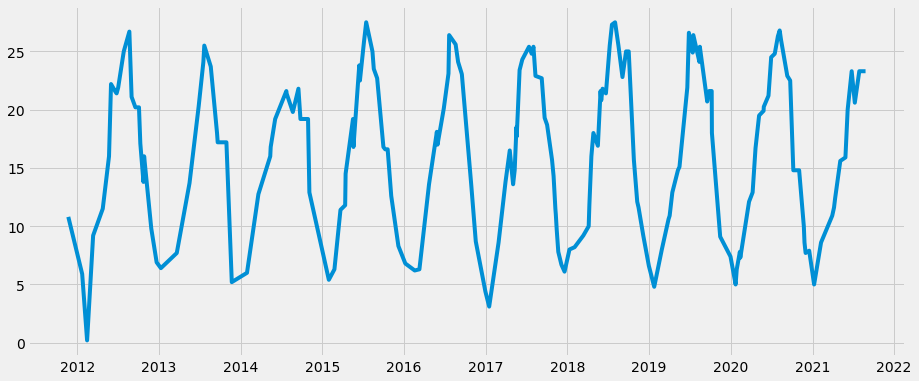

Potentiel en Hydrogène (pH)


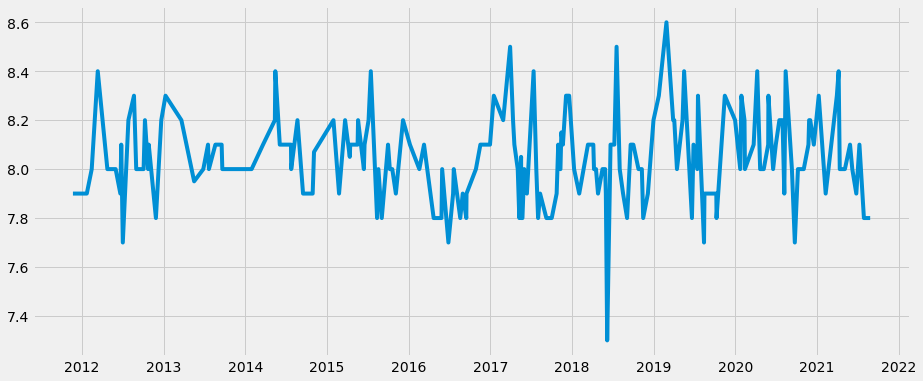

Taux de saturation en oxygène


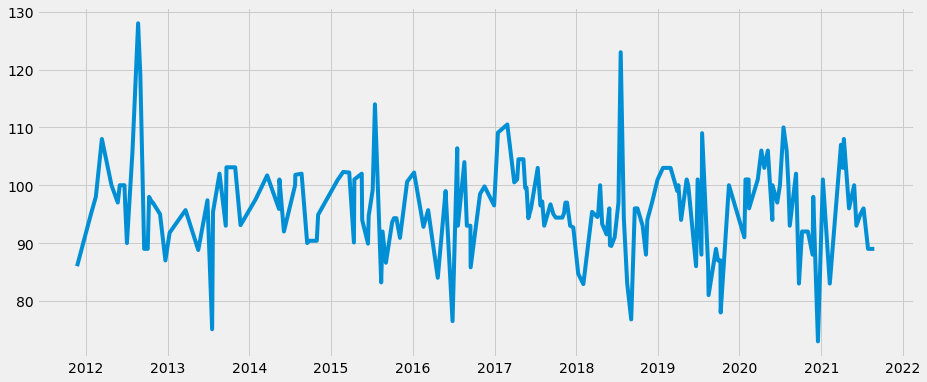

Carbone Organique


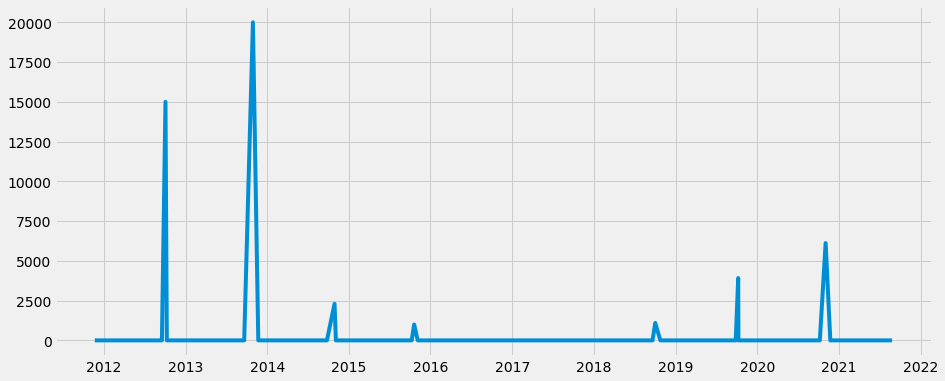

Turbidité Formazine Néphélométrique


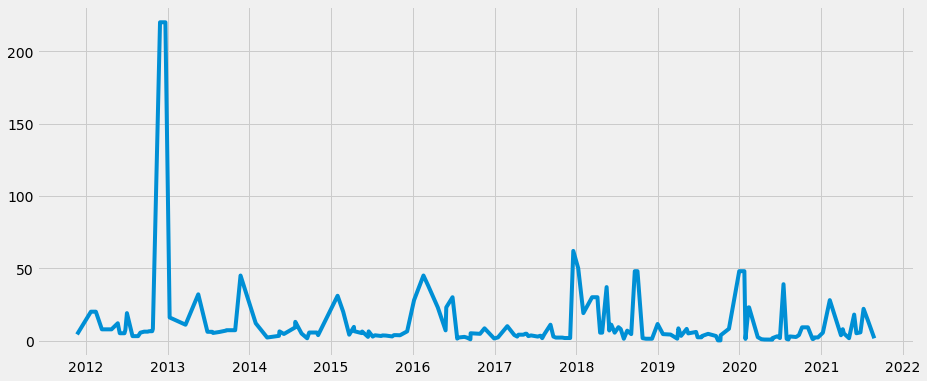

Ammonium


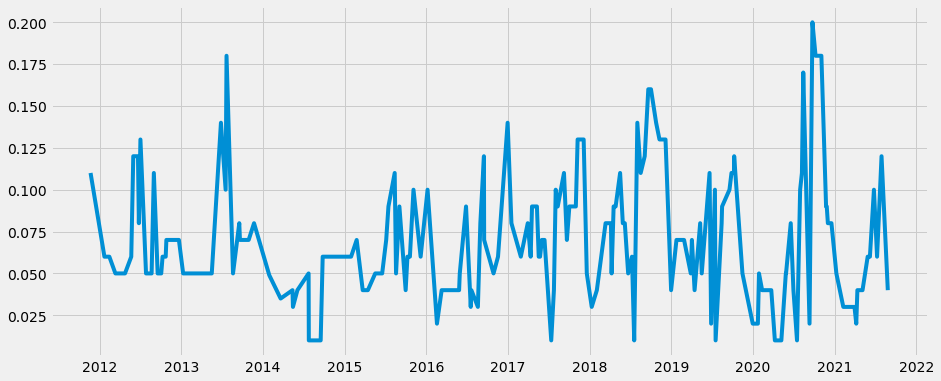

Demande Chimique en Oxygène (DCO)


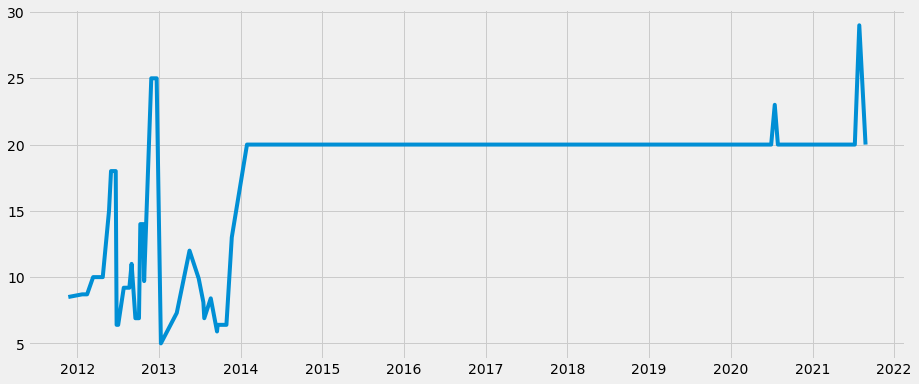

Orthophosphates (PO4)


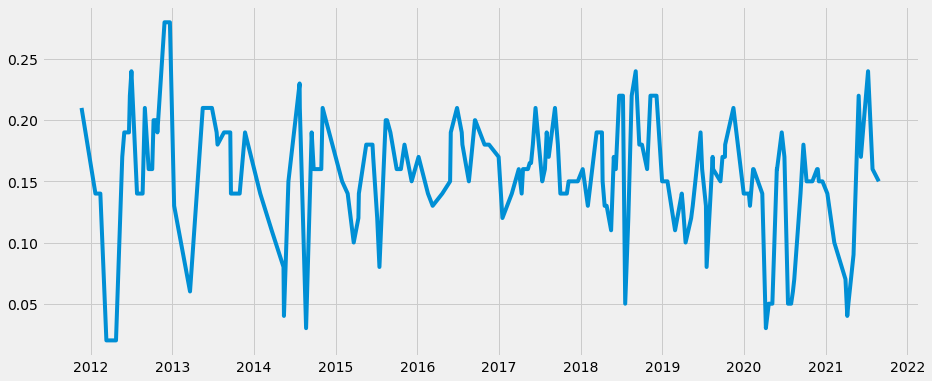

Demande Biochimique en oxygène en 5 jours (D.B.O.5)


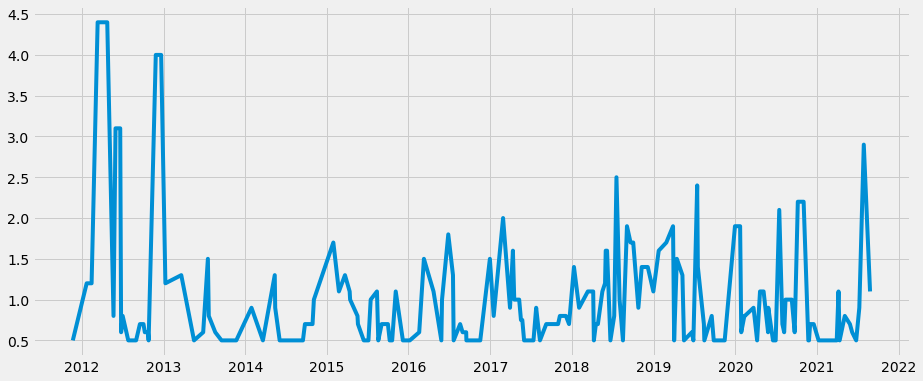

Phosphore total


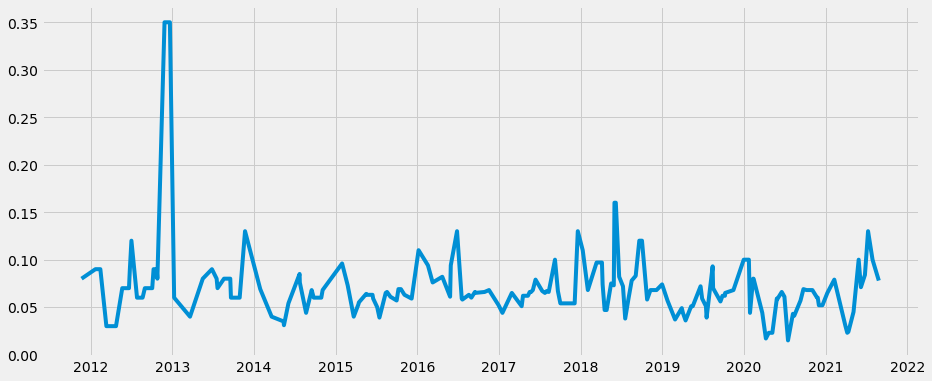

Azote Kjeldahl


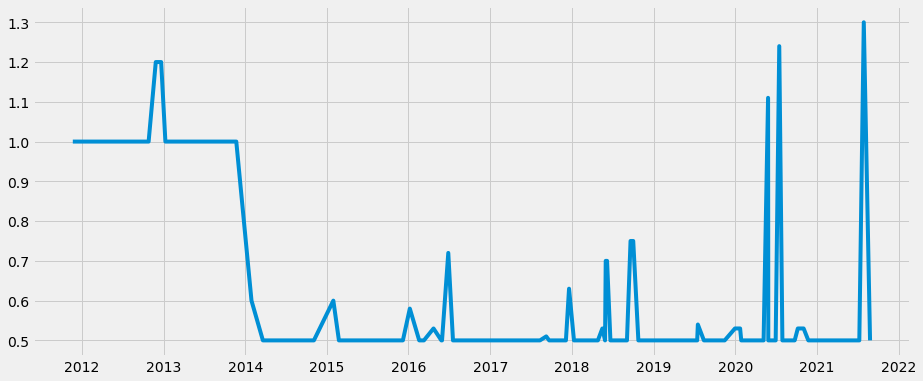

Nitrates


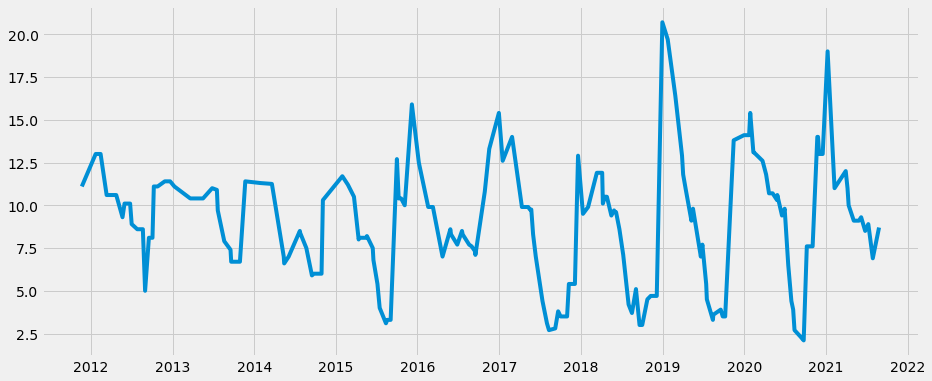

Nitrites


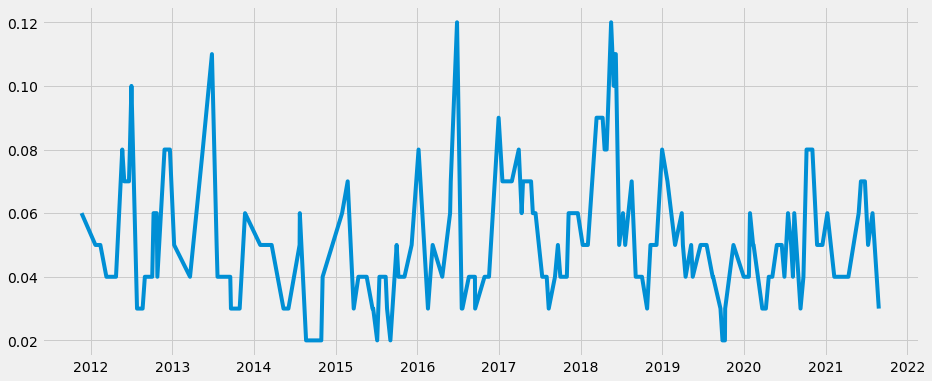

Matières en suspension


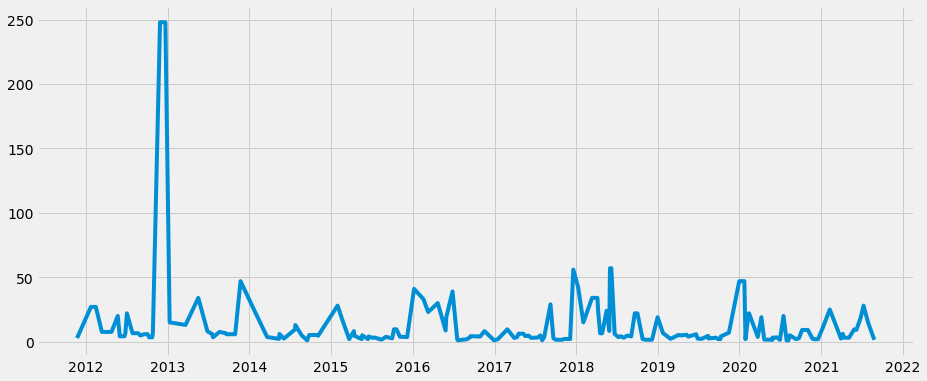

Silicates


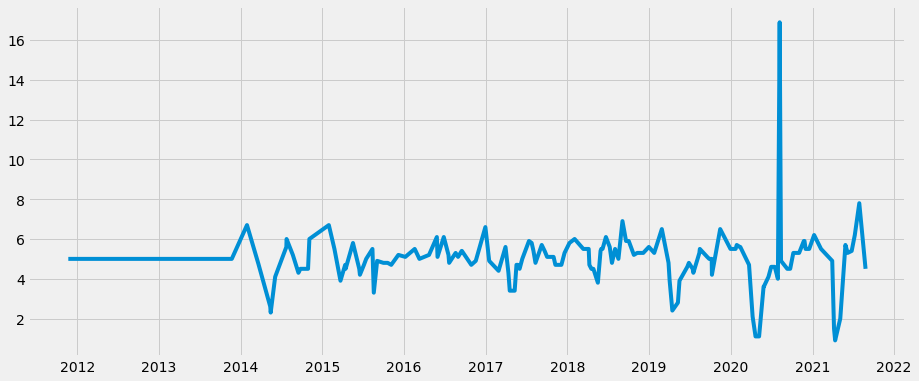

In [28]:
with plt.style.context('fivethirtyeight'):

    for col in merged_df.columns :
        print(param_id_lb.loc[int(col),'LbLongParamètre'])
        plt.figure(figsize=(14,6))
        plt.plot(merged_df.index,merged_df[col])
        plt.show()

    plt.show()